### Парадокс инспектора

Автобусы отходят от автостанции с 8:00 до 20:00. Первый автобус отходит ровно в 8:00. Затем интервалы между автобусами случайны, независимы и равновероятно равны либо 5-и, либо 10-и минутам. Будем считать, что за минуту на автостанцию приходит ровно один пассажир, и все пассажиры едут ближайшим автобусом.

Проведём $10^4$ экспериментов и с их помощью:

а) Построим гистограмму количества автобусов, отошедших от автостанции за сутки. Похоже ли визуально распределение на нормальное?

б) Инспектор Тимон выбирает равновероятно один из всех автобусов отошедших от автостанции за сутки. Построим гистограмму числа пассажиров на этом автобусе. Оценим математическое ожидание и дисперсию этого числа.

в)Инспектор Пумба приходит на автостанцию в случайный момент времени, равномерный от 8:00 до 20:00 и садится в первый пришедший автобус. Построим гистограмму числа пассажиров на этом автобусе. Оценим математическое ожидание и дисперсию этого числа.


г)Что произойдет, если время между автобусами будет экспоненциально со средним в 10 минут?

 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.pyplot import figure



In [222]:
pip install qbstyles

Note: you may need to restart the kernel to use updated packages.


In [6]:
from qbstyles import mpl_style

mpl_style(dark=False)

## Пункт А

95.8965

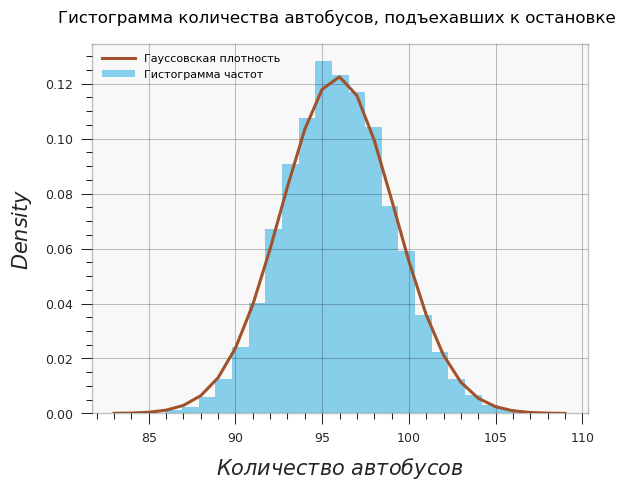

In [30]:
def money(x):
    return np.count_nonzero(x[np.cumsum(x) <= 720])

n_obs = 10**4


a = np.random.RandomState(69).choice([5,10], size=(n_obs,144), replace=True, p=[0.5, 0.5])
vib = np.apply_along_axis(money, axis = 1, arr = a)

norm_rv = stats.norm(np.mean(vib), np.std(vib))

plt.ylabel('$Density$', fontsize = 15)
plt.xlabel('$Количество \\ автобусов$', fontsize = 15);


plt.plot(np.arange(83,110),norm_rv.pdf(np.arange(83,110)), linewidth = 2.2, linestyle = '-', color = 'sienna', label = 'Гауссовская плотность')
plt.hist(vib, bins = 25, density = True, label = 'Гистограмма частот', color = 'skyblue')

plt.title('Гистограмма количества автобусов, подъехавших к остановке ')
plt.legend(loc = 'upper left', fontsize = 8,frameon = False,   handlelength = 3, shadow = False)

np.mean(vib)


*Как мы видим на графике, распределение количества автобусов крайне сильно походит на нормальное, что подтверждается довольно точным совпадение гистограммы и функции плотности соответствующего распределения.
При этом в среднем за 12 часов проходит 95 автобусов, т.е. время ожидания одного автобуса  $\approx$ 7.5, что соответствует теоретическому матожиданию, если автобусы приходят равновероятно через 10 или 5 минут. Вроде бы все прекрасно, но ведь на практике автобусы не ходят идеально по расписанию, и вариантов для интервала между двумя идущими друг за другом транспортными средствами может быть много больше.*

## Пункт Б

матожидание -  7.5205
дисперсия -  6.24957975


(4.0, 11.0)

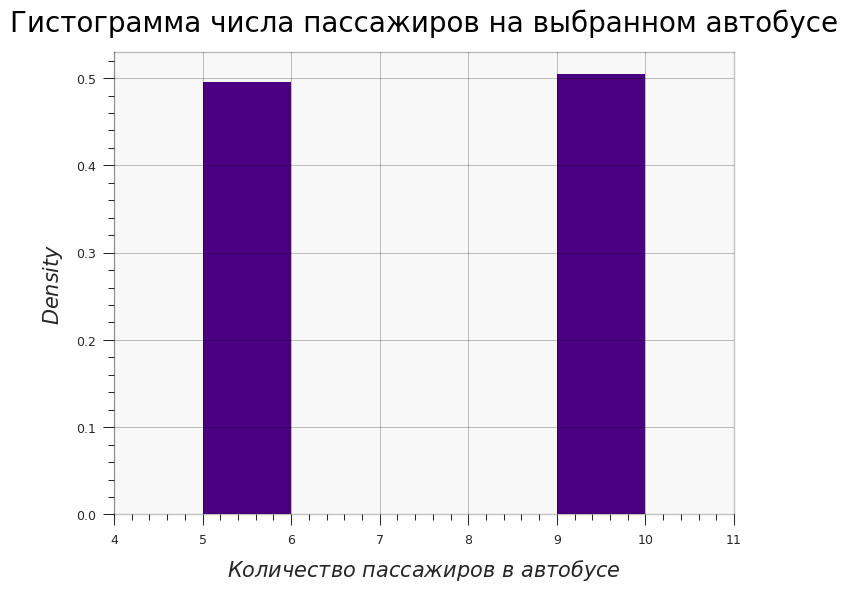

In [39]:
np.random.seed(92)

def bablo(x):
    return np.random.choice(x[np.cumsum(x) <= 720], 1, replace=True) 


a = np.random.choice([5,10], size=(n_obs,144), replace=True, p=[0.5, 0.5])
num_of_ppl = np.apply_along_axis(bablo, axis = 1, arr = a)


print('матожидание - ', np.mean(num_of_ppl))
print('дисперсия - ', np.var(num_of_ppl))

plt.figure(figsize=(8, 6))
plt.hist(num_of_ppl, bins = 5, density = True, color = 'indigo')

plt.ylabel('$Density$', fontsize = 15)
plt.xlabel('$Количество \\ пассажиров \\ в \\ автобусе$', fontsize = 15);
plt.title('Гистограмма числа пассажиров на выбранном автобусе', fontsize = 20)
plt.xlim((4,11))

*В среднем в автобусе находится примерно 7.5 человек, что эквивалентно интервалу в 7.5 минут и соответствует характеристике распределения интервалов автобусов(дисперсия тоже совпадает вообще праткически точь-в-точь : 6.25). Это нетрудно интерпретировать: ведь инспектор равновероятно выбирает 1 автобус, и поэтому в среднем вероятность конкретного типа автобуса( $\sim$ количеству пассажиров на нём) примерно одинакова, что мы и видим на гистограмме, причем распределено число людей в автобусе так же, как и интервалы автобусов с одинаковыми $p$, все потому, что равновероятный выбор автобуса(а не времени прихода!) не оказывает влияния, потому что распределение как-бы "протягивается" через операцию этого выбора без особых изменений, потому что каждому автобусу присуждена одна и та же вероятность.*


## Пункт В


Матожидание =  8.3215
Дисперсия =  5.5751377500000014


(4.0, 11.0)

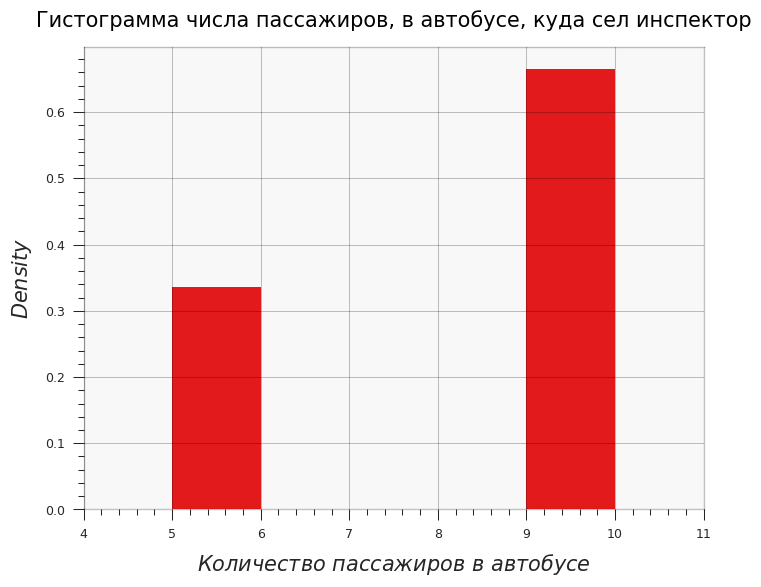

In [32]:
np.random.seed(83)


a = np.random.choice([5,10], size=(n_obs,144), replace=True, p=[0.5, 0.5])


def function(x):
    time = stats.uniform(0,720 - np.max(x) ).rvs(1)
    chse = x[np.cumsum(x) <= 720]
    return (chse[np.cumsum(chse) - time == np.min((np.cumsum(chse) - time)[(np.cumsum(chse) - time) >= 0])])



num_of_ppl_2 = np.apply_along_axis(function, axis = 1, arr = a )


print('Матожидание = ', np.mean(num_of_ppl_2))
print('Дисперсия = ', np.var(num_of_ppl_2))


plt.figure(figsize=(8, 6))


plt.hist(num_of_ppl_2, bins = 5, density = True)
plt.ylabel('$Density$', fontsize = 15)
plt.xlabel('$Количество \\ пассажиров \\ в \\ автобусе$', fontsize = 15);


plt.title('Гистограмма числа пассажиров, в автобусе, куда сел инспектор', fontsize = 15)
plt.xlim((4,11))



*В этом пункте видно, что усредненное число пассажиров в автобусе меняется: намного чаще начинают встречаться автобусы с 10 людьми. Происходит это из-за того, что выбирается не рандомный автобус, а рандомный момент времени, что несколько меняет ситуацию: т.к. 10-минутные автобусы "забирают" на себя больший участок временной линии, то и попасть именно в часть интервала приезда такого автобуса становится выше. Поэтому происходит смещение типа автобуса(количества пассажиров в нем) в сторону 10. При этом дисперсия слегка падает, потому что все больше значений соответствуют 10, а значит, и отклонение в среднем поменьше.*

## Пункт Г

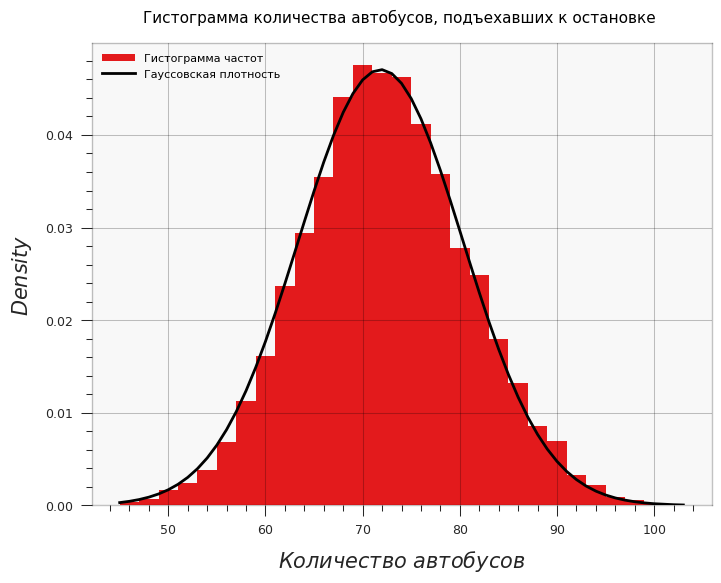

In [33]:
np.random.seed(47)
avt = stats.expon(scale=10).rvs((n_obs, 760))


sam = np.apply_along_axis(money, axis = 1, arr = avt)
norm_rv = stats.norm(np.mean(sam), np.std(sam))

plt.figure(figsize=(8, 6))
plt.hist(sam, bins = 29, density = True, label = 'Гистограмма частот')
plt.plot(np.unique(sam),norm_rv.pdf(np.unique(sam)), linewidth = 2, linestyle = '-', color = 'black', label = 'Гауссовская плотность')



plt.title('Гистограмма количества автобусов, подъехавших к остановке ', fontsize = 11)
plt.ylabel('$Density$', fontsize = 15)
plt.xlabel('$Количество \\ автобусов$', fontsize = 15);


plt.legend(loc = 'upper left', fontsize = 8,frameon = False,   handlelength = 3, shadow = False)


*Как видим, всё еще очень похоже на нормальное распределение, это можно списать на ЦПТ, ведь если время между событиями распределено экспоненциально, то количество событий на единицу времени распределено по пуассону. Складывая много пуассоновских величин (> 30), приходим к ЦПТ. В целом, такая логика применима и к пункту "а".*

матожидание =  9.6871
дисперсия =  100.34779359


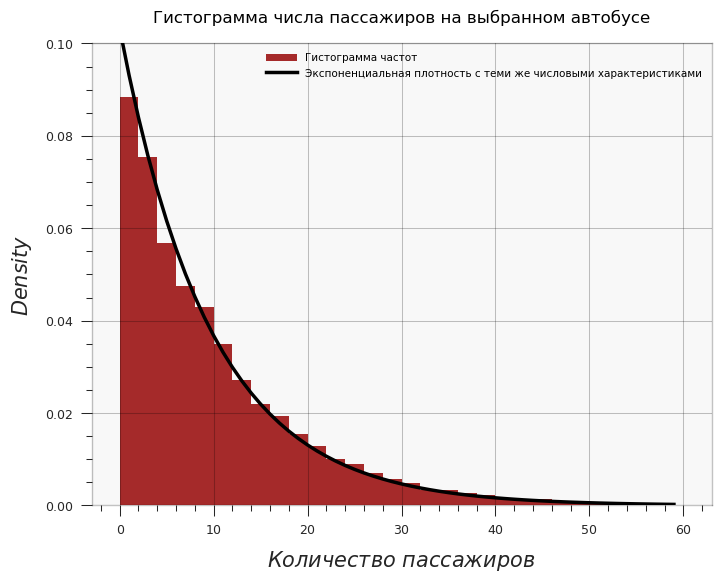

In [34]:
def bablo_2(x):
    return int(np.random.RandomState(300).choice(x[np.cumsum(x) <= 750], 1, replace=True)) 


num_of_ppl_new = np.apply_along_axis(bablo_2, axis = 1, arr = avt)

plt.figure(figsize=(8, 6))
plt.hist(num_of_ppl_new, bins = 30, range = (0, 60), density = True, color = 'brown', label = 'Гистограмма частот')


print('матожидание = ', np.mean(num_of_ppl_new))
print('дисперсия = ', np.var(num_of_ppl_new))

exp = stats.expon(scale=np.mean(num_of_ppl_new))
plt.plot(exp.pdf(np.arange(0,60)), linewidth = 2.5, color  = 'black', label = 'Экспоненциальная плотность с теми же числовыми характеристиками')


plt.ylabel('$Density$', fontsize = 15)
plt.xlabel('$Количество \\ пассажиров$', fontsize = 15)


plt.title('Гистограмма числа пассажиров на выбранном автобусе')
plt.ylim(0,0.1)
plt.legend(loc = 'upper right', fontsize = 7.5,frameon = False,   handlelength = 3, shadow = False)

*Заметим, что среднее число пассажиров в автобусе распределено экспоненциально $ \rightarrow $ в среднем ожидание одного автобуса распределено так же, при этом оно в среднем близко уже к 10, что очень похоже на матожидание, заданное для времени автобусов. При этом кол-во пассажиров распределено так же, как и интервалы, потому что человек выбирает случайный автобус(что происходит равновероятно), и значит, никаким образом на большом количестве наблюдений не оказывает влияния на распределения(уловно, в формуле байеса вероятности событий из полной группы сокращаются).*  

Матожидание =  20.070057782817177
Дисперсия =  201.4478825800471


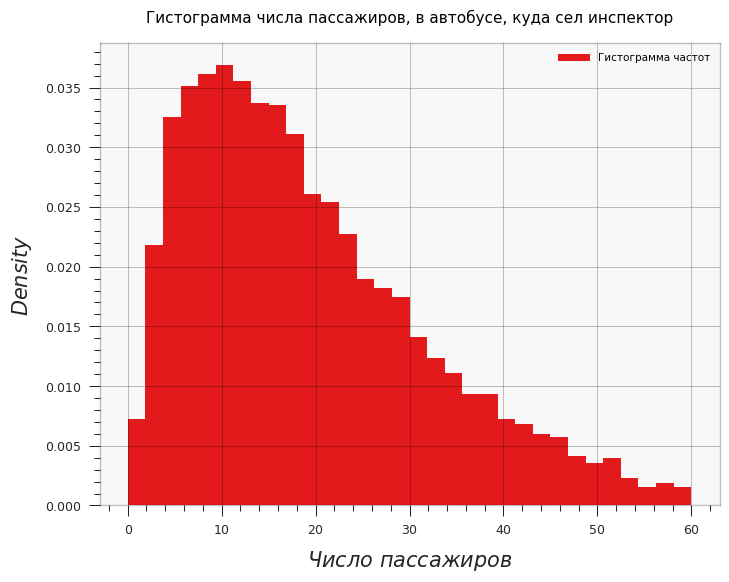

In [38]:
np.random.seed(111)




num_of_ppl_2_new = np.apply_along_axis(function, axis = 1, arr = avt )


print('Матожидание = ', np.mean(num_of_ppl_2_new))
print('Дисперсия = ', np.var(num_of_ppl_2_new))

plt.figure(figsize=(8, 6))
plt.hist(num_of_ppl_2_new, bins = 32, range = (0,60), density = True, label = 'Гистограмма частот')


plt.title('Гистограмма числа пассажиров, в автобусе, куда сел инспектор', fontsize = 11)
plt.xlabel('$Число \\ пассажиров$', fontsize = 15)
plt.ylabel('$Density$', fontsize = 15)



plt.title('Гистограмма числа пассажиров, в автобусе, куда сел инспектор', fontsize = 11)
plt.xlabel('$Число \\ пассажиров$', fontsize = 15)
plt.ylabel('$Density$', fontsize = 15)



plt.legend(loc = 'upper right', fontsize = 7.5,frameon = False,   handlelength = 3, shadow = False)




 *Число людей для инспектора, садящегося в автобус, распределено теперь, скорее, по пуассону, и это объяснимо, потому что выбирая момент времени, а не автобус!!!, мы по факту уже имеем дело с пуассоновским процессом, тогда если длины временных отрезков(приходы автобусов) распределены экспоненциально, то кол-во событий(число пассажиров) за единицу времени должно быть пуассоновской с.в., при этом все так же сохраняется тенденция на то, что приходя на остановку, инспектор действительно в среднем ждет сильно дольше(уже в 2 раза, что и утверждает, кстати говоря, парадокс, и что во многом гарантирует огромная дисперсия, которая заставляет кол-во пассажиров сильно "колебаться"). Это объяснимо, потому что теперь человек выбирает не случайный автобус(что происходит равновероятно), а время прихода, и для автобусов с большими интервалами ожидания вероятность попадания именно на их тип становится выше, отчего таких ситуаций в среднем становится больше, и, как следствие, среднее кол-во людей в автобусе(время ожидания) растет. Такая ситуация очень неплохо бьется с реальной жизнью, потому что часто, зная расписание автобусов, человек, приходя на остановку, вынужден ждать  дольше, чем мог бы наивно надеяться.*

### Парадокс Хуана Мануэля Родригеса Паррондо

У Атоса, Портоса и Арамиса по 1000 франков. Атос постоянно ходит в казино А, где каждый раз выигрывает один франк с вероятностью $0.49$ и проигрывает один франк с вероятностью $0.51$. Портос ходит в казино Б, где ситуация интереснее: 

- Если богатство посетителя кратно трём, то посетитель выигрывает франк с вероятностью $0.09$ и проигрывает один франк с вероятностью $0.91$
- Если богатство посетителя не кратно трём, то посетитель выигрывает франк с вероятностью $0.74$ и проигрывает один франк с вероятностью $0.26$

Арамис каждый раз выбирает казино А или казино Б равновероятно. Проведите $10^4$ симуляций эволюции благосостояния Атоса, Портоса и Арамиса.Каждая симуляция предусматривает $1000$ посещений казино. Все три игрока все деньги носят с собой и ни на что не тратят

а)Изобразим на графике $10$ случайных траекторий изменений богатства Атоса, по горизонтали — номер посещени казино, по вертикали — богатство. На том же графике изобразим усреднённую по всем экспериментам тракторию изменения богатства.

б)Построим на графике $10$ случайных траекторий изменений богатства Портоса, по горизонтали —  номер посещени казино, по вертикали — богатство. На том же графике построим усреднённую по всем экспериментам тракторию изменения богатства.

в)Построим на графике $10$ случайных траекторий изменений богатства Арамиса, по горизонтали — номер посещени казино, по вертикали — богатство. На том же графике построим усреднённую по всем экспериментам тракторию изменения богатства.
    

## Пункт а

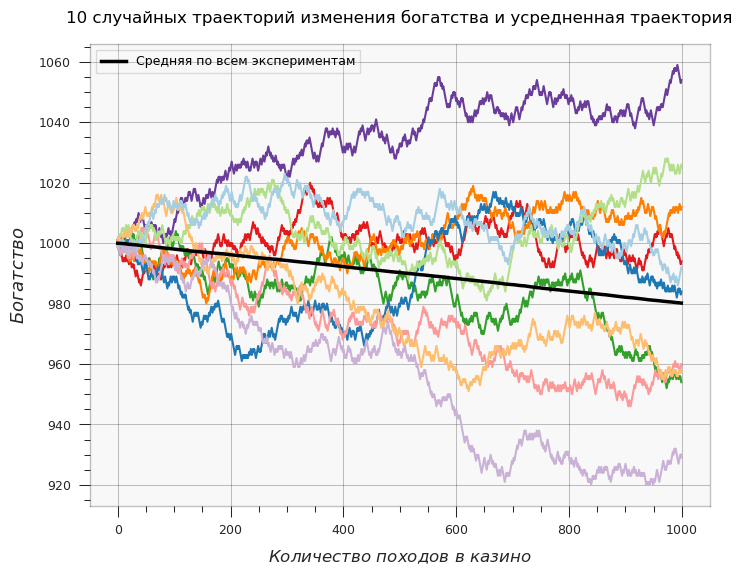

In [139]:
np.random.seed(5)


def igra_atos(x):
    return x + np.random.choice([1,-1], size=1000, p=[0.49, 0.51])
n_sim = 10**4
sim_atos = np.full((n_sim, 1000), 0)
sim_atos[:,0] += 1000
sim_atos = np.apply_along_axis(igra_atos, axis = 1, arr = sim_atos)


result_atos = np.apply_along_axis(np.cumsum, axis = 1, arr = sim_atos)
res = result_atos[np.random.choice(range(0,1000), size = 10), :]



plt.figure(figsize=(8, 6))
pic = np.apply_along_axis(plt.plot, axis = 1, arr = res)

mean_over_all_atos = np.apply_along_axis(np.mean, axis = 0, arr = result_atos )
plt.plot(np.arange(1000), mean_over_all_atos, color = 'Black', label = 'Средняя по всем экспериментам', linewidth = 2.5) 


plt.title('10 случайных траекторий изменения богатства и усредненная траектория', fontsize = 12)
plt.xlabel('$Количество \\ походов \\ в \\ казино$', fontsize = 12)
plt.ylabel('$Богатство$', fontsize = 13)

plt.legend()




#plt.hist(result_atos[::, -1], bins = 27)

*Результат, в целом, предсказуем, явно наблюдается нисходящий тренд по стратегии. И это понятно: вероятность выиграть при каждом походе хоть немного, но меньше, поэтому при большом количестве попыток Атос будет свое богатство потихоньку терять.*

## Пункт б

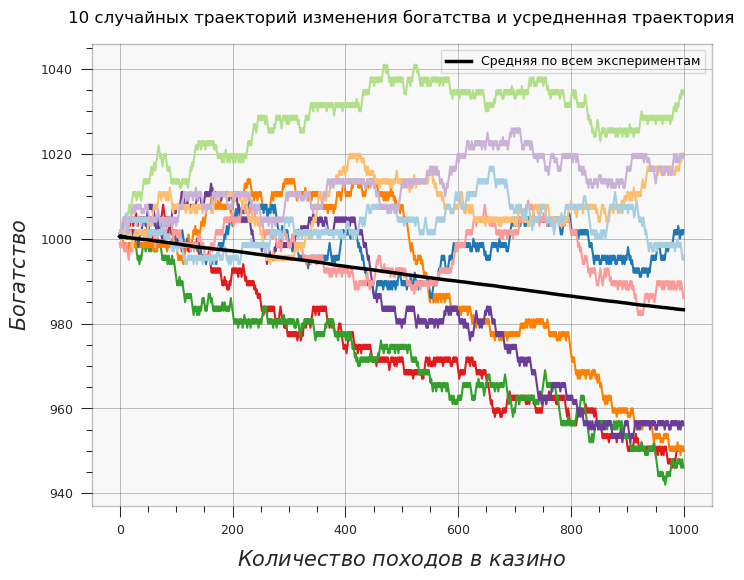

In [141]:
np.random.seed(90)


sim_portos = np.full((n_sim, 10**3), 0)



def igra_portos(x):
    b = 1000
    for i in range(1000): 
        if b % 3 == 0:
            b += np.random.choice([1,-1], size=1, p=[0.09, 0.91])
            x[i] = b
        else:
            b += np.random.choice([1,-1], size=1, p=[0.74, 0.26])
            x[i] = b
    return x 



result_portos = np.apply_along_axis(igra_portos, axis = 1, arr = sim_portos)
res_port = result_portos[np.random.choice(range(0,1000), size = 10), :]



plt.figure(figsize=(8, 6))
np.apply_along_axis(plt.plot, axis = 1, arr = res_port)

mean_over_all_portos = np.apply_along_axis(np.mean, axis = 0, arr = result_portos)
plt.plot(np.arange(1000), mean_over_all_portos, color = 'black', label = 'Средняя по всем экспериментам', linewidth = 2.5)  



plt.xlabel('$Количество \\ походов \\ в \\ казино$', fontsize = 15)
plt.ylabel('$Богатство$', fontsize = 15)

plt.title('10 случайных траекторий изменения богатства и усредненная траектория', fontsize = 12)
plt.legend()

*Ситуация с портосом также довольно ожидаема: даже если рассматривать какой-то конечный набор целых чисел, в среднем 2 из 3 не будут кратны трём, поэтому Портос будет угождать в крайне неприятную ситуацию с очень маленькой вероятностью выиграть свой заветный франк. Результат на лицо: тренд по приращению богатства убывающий.*

## Пункт в

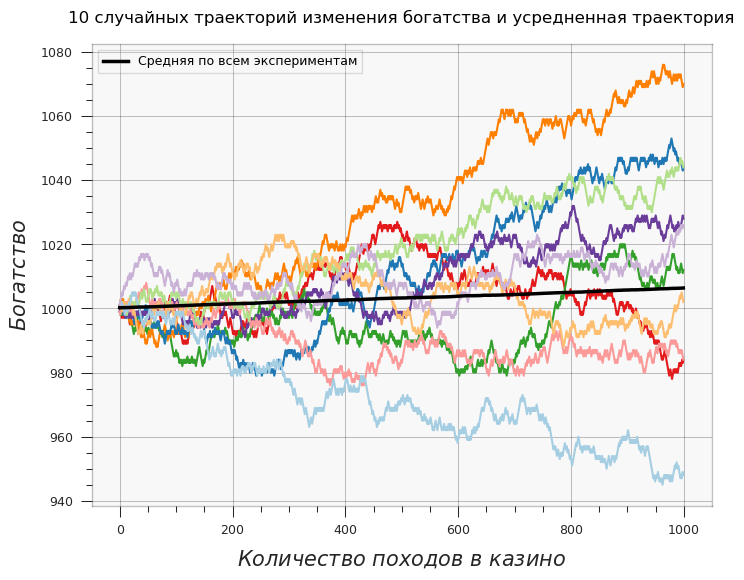

In [142]:
np.random.seed(100)

aramis_choice = np.random.choice([1,0], size = (n_sim, 10**3))


def igra_aramis(x):
    b = 1000
    for i in range(1000):
        if x[i] == 1:
            b += np.random.choice([1,-1], size=1, p=[0.49, 0.51])
            x[i] = b  
        else:
            if b % 3 == 0:
                b += np.random.choice([1,-1], size=1, p=[0.09, 0.91])
                x[i] = b
            else:
                b += np.random.choice([1,-1], size=1, p=[0.74, 0.26])
                x[i] = b
    return x 


sample_aramis = np.apply_along_axis(igra_aramis, axis = 1, arr = aramis_choice )
res_aramis = sample_aramis[np.random.choice(np.arange(0,10**4), size = 10), :]


plt.figure(figsize=(8, 6))
np.apply_along_axis(plt.plot, axis = 1, arr = res_aramis)
mean_over_all_aramis = np.apply_along_axis(np.mean, axis = 0, arr = sample_aramis)


plt.plot(np.arange(1000), mean_over_all_aramis, color = 'black', label = 'Средняя по всем экспериментам', linewidth = 2.5)


plt.xlabel('$Количество \\ походов \\ в \\ казино$', fontsize = 15)
plt.ylabel('$Богатство$', fontsize = 15)
plt.title('10 случайных траекторий изменения богатства и усредненная траектория', fontsize = 12)


plt.legend()


*В этом пункте мы наконец-то сталкиваемся с чем-то парадоксальным: Арамис миксует две заведомо проигрышных стратегии и, к удивлению, в среднем выигрывает!
Это можно объяснить тем, чо ломается схема "2 из 3 чисел не кратны 3", потому что вторая стратегия, выбираемая равновероятно, изменяет подобную закономерность.*

### Парадокс Берксона

Предположим, что результаты ЕГЭ школьников по русскому и математике независимы и хорошо аппроксимируются 
нормальным распределением с ожиданием 60 и стандартным отклонением 10. 

УШЭ (Урюпинская Школа Экономики) ныне престижна и забирает себе всех школьников набравших более $n$ баллов в сумме по русскому и математике. 

Для каждого $n$ от $80$ до $160$ с шагом $5$ случайно создадим $10^4$ школьников и поделим их на прошедших и не прошедших в УШЭ.


а) Для начала изобразим график числа прошедших в УШЭ в зависимости от $n$. 

б-в) Построим график выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди прошедших в УШЭ и график выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди не прошедших в УШЭ.


## Пункт а


In [20]:
from scipy.stats import pearsonr
import copy

Text(0.5, 1.0, 'График числа прошедших в УШЭ в зависимости от  $n$')

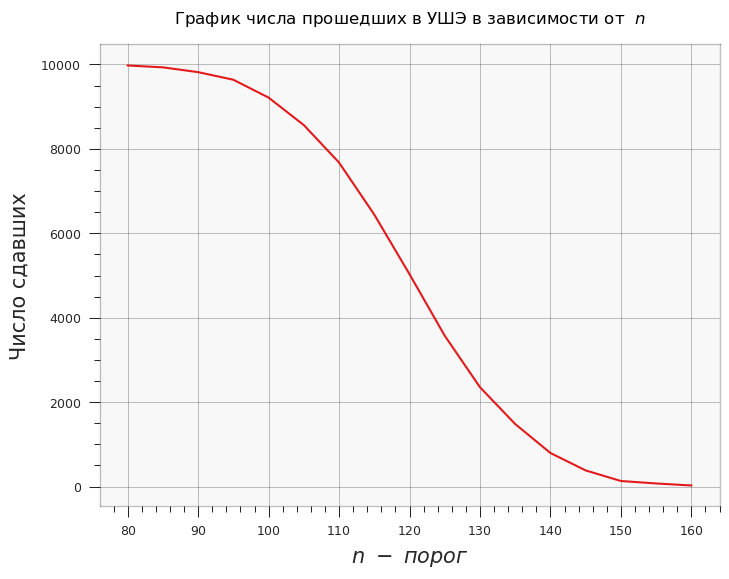

In [21]:
np.random.seed(5)

n_stud = 10**4

x_i = stats.norm(60, 10)
l_n = np.array(range(80,161))[::5]

ma = x_i.rvs((n_stud, 17))
ru = x_i.rvs((n_stud, 17))


check = np.full((n_stud, 17), l_n)
itog = (ma + ru) - check
itog[itog < 0] = 0


plt.figure(figsize=(8, 6))
plt.plot(l_n, np.apply_along_axis(np.count_nonzero, axis = 0, arr = itog))


plt.ylabel('Число сдавших', fontsize = 15)
plt.xlabel('$n \ - \ порог$', fontsize = 15);
plt.title('График числа прошедших в УШЭ в зависимости от  $n$')


*В данном графике зависимость понятна: чем больше нужен суммарный баллов для поступления, тем меньше людей пройдет эту грань. Причем все хорошо сопоставляется с распределением суммы баллов:так, 80 баллов набирают практически все, потому что вероятность  в сумме набрать меньше 80 довольно маленькая, и практически все переступают порог. На 120 баллах порога половина людей не проходит(что логично, вероятность набрать больше 120 = 0.5, а если интерпретировать вероятность как идеализированную модель частоты, то это 5000 из 10000 человек). И после 120 баллов доля прошедших закономерно падает ниже 0.5. Причем число прошедших конкретный порог можно получить из соотношения: $N_n \approx 10000 \cdot P(X > n), \\  X \sim  N(120,20)$*

In [27]:
z = stats.norm(120, 20)
z.cdf(80)

0.022750131948179195

## Пункт б

Text(0.5, 1.0, 'График выборочной корреляции результатов прошедших в УШЭ')

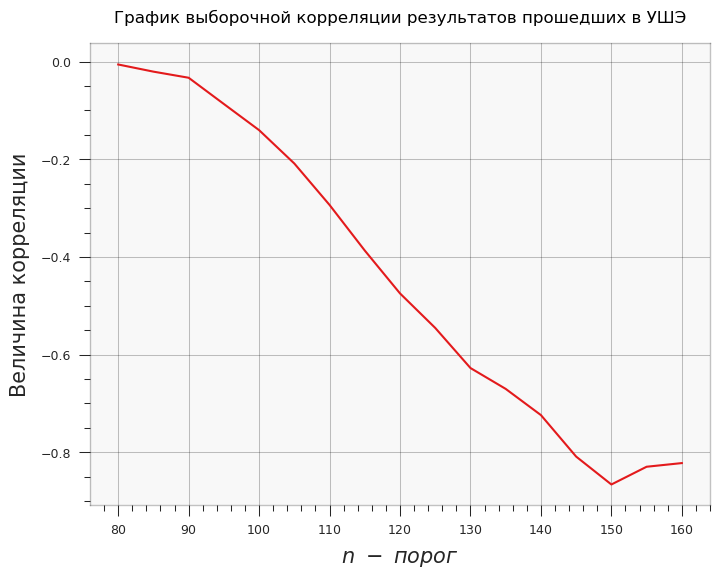

In [22]:
overall_passed = np.vstack((ma,ru))
overall_no_pass = copy.copy(overall_passed)
itog_both_sub = np.vstack((itog,itog))

overall_passed[itog_both_sub == 0] = 0

def f(x):
    return pearsonr(x[:n_stud][x[:n_stud]!=0], x[n_stud::][x[n_stud::]!=0]).statistic


plt.figure(figsize=(8, 6))
plt.plot(l_n, np.apply_along_axis(f, axis = 0, arr = overall_passed))


plt.ylabel('Величина корреляции', fontsize = 15)
plt.xlabel('$n \ - \ порог$', fontsize = 15)
plt.title('График выборочной корреляции результатов прошедших в УШЭ')

*Вот и первый интуитивно алогичный результат: по условию результаты независимы, но корреляция очевидно ненулевая. Дело в том, что ограничивая выборку и тем самым ограничивая вероятностное пространство мы меняем факт зависимостей событий "набрать $\le$ x баллов по математике" и "набрать $\le$ y баллов по русскому". Наложения условия 'не прошел' или 'прошел' автоматически накладывает ограничение на сумму с.в., отвечающих за баллы по каждому предмету, отсюда и выливается зависимость.
Убывание выборочной корреляции тоже объясняется: если человек все-таки прошел при пороге в, например, 80 баллов, то учитывая распределение с.в., нам становится практически плевать на то, какие баллы набраны по каждом из предметов, и они никак друг на друга не влияют, потому что набрать меньше 40 по обоим предметам и пройти невозможно, помимо этого сама вероятность набрать меньше 40 крайне мала, не говоря уже о накладываемом условии. Так, дальнейшее убывание корреляции и ее отрицательность тоже интерпретируема: вероятность набрать по обоим предметам 80+ при условии, что человек прошел, тоже очень мала, таких случаев мало, значит баллы вряд ли растут вместе, остаются случаи, когда по одному предмету баллов сильно больше чем по другому, то есть отрицательная корреляци, что мы и видим*

In [23]:
#- Веротяность получить меньше 40
x_i.cdf(40)

0.022750131948179195

In [28]:
(1 - x_i.cdf(80))**2/(1 - z.cdf(160))

# - Условная вероятность сдать сразу оба предмета более, чем на 80

0.02275013194817921

## Пункт в

Text(0.5, 1.0, 'График выборочной корреляции результатов не прошедших в УШЭ')

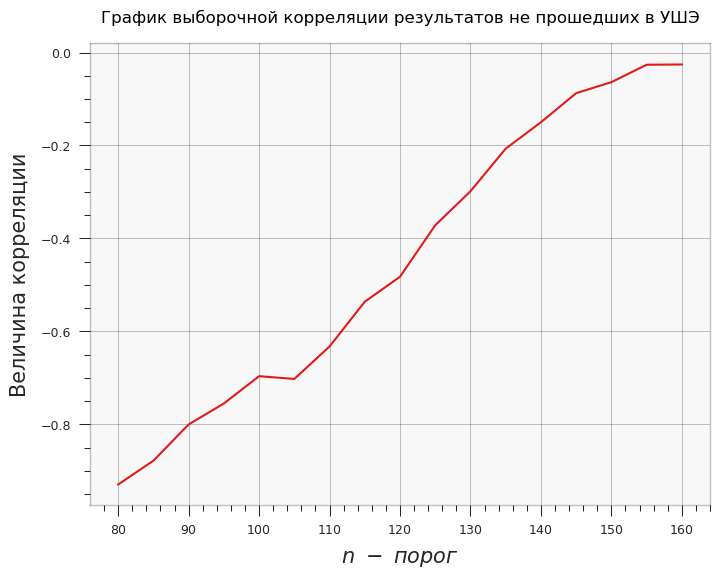

In [145]:
overall_no_pass[itog_both_sub != 0] = 0


plt.figure(figsize=(8, 6))
plt.plot(l_n, np.apply_along_axis(f, axis = 0, arr = overall_no_pass))


plt.ylabel('Величина корреляции', fontsize = 15)
plt.xlabel('$n \ - \ порог$', fontsize = 15)

plt.title('График выборочной корреляции результатов не прошедших в УШЭ')

*Тут логика обратная: при пороге в 80 вероятность набрать сразу по двум предметам <40 довольно мала, и такие случаи вносят мало корректив в общую выборку, значит, остаются случаи, когда по одному предмету баллов сильно меньше, чем по другому.
В случае высокого порога вероятность набрать по обоим предмета $< \frac{n}{2}$ относительно высока, поэтому в целом нет никакого влияния баллов одного предмета на другой, т.е. рост баллов по одному не вызывает падение баллов по другому, как в случае с малым $n$.*

Text(0.5, 1.0, 'График выборочной корреляции результатов всех абитуриентов')

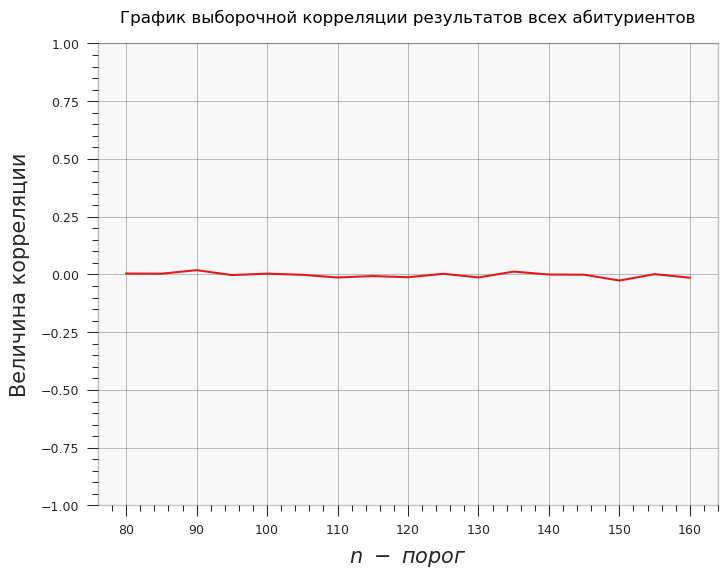

In [146]:
plt.figure(figsize=(8, 6))

plt.plot(l_n, np.apply_along_axis(f, axis = 0, arr = np.vstack((ma,ru))))
plt.ylim(-1,1)

plt.ylabel('Величина корреляции', fontsize = 15)
plt.xlabel('$n \ - \ порог$', fontsize = 15)

plt.title('График выборочной корреляции результатов всех абитуриентов')

*В дополнении изобразим "безусловную" корреляцию, которая, как и подсказывает интуиция, приблизительно нулевая.*